In [14]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [162]:
import matplotlib.pyplot as plt
import seaborn
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
import csv

In [31]:
X = []
Y = []

In [134]:
df = pd.read_csv('./BTC_merged_2010_to_2025.csv')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   5474 non-null   object 
 1   timeClose  5474 non-null   object 
 2   timeHigh   5474 non-null   object 
 3   timeLow    5474 non-null   object 
 4   name       5474 non-null   int64  
 5   open       5474 non-null   float64
 6   high       5474 non-null   float64
 7   low        5474 non-null   float64
 8   close      5474 non-null   float64
 9   volume     5474 non-null   float64
 10  marketCap  5474 non-null   float64
 11  timestamp  5474 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 513.3+ KB


In [71]:
df.head(5)

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2010-07-14T00:00:00.000Z,2010-07-14T23:59:59.999Z,2010-07-14T00:34:00.000Z,2010-07-14T19:24:00.000Z,2781,0.058157,0.061588,0.048647,0.056402,261.54,190259.65,2010-07-14 23:59:59.999000+00:00
1,2010-07-15T00:00:00.000Z,2010-07-15T23:59:59.999Z,2010-07-15T11:39:00.000Z,2010-07-15T00:41:00.000Z,2781,0.056403,0.067954,0.053969,0.057568,445.80,195982.14,2010-07-15 23:59:59.999000+00:00
2,2010-07-16T00:00:00.000Z,2010-07-16T23:59:59.999Z,2010-07-16T02:11:00.000Z,2010-07-16T00:24:00.000Z,2781,0.058001,0.072220,0.057484,0.066492,497.25,228047.42,2010-07-16 23:59:59.999000+00:00
3,2010-07-17T00:00:00.000Z,2010-07-17T23:59:59.999Z,2010-07-17T06:51:00.000Z,2010-07-17T16:21:00.000Z,2781,0.066500,0.077735,0.057418,0.065993,19.99,226904.80,2010-07-17 23:59:59.999000+00:00
4,2010-07-18T00:00:00.000Z,2010-07-18T23:59:59.999Z,2010-07-18T17:38:00.000Z,2010-07-18T00:28:00.000Z,2781,0.066088,0.080858,0.064221,0.078814,75.13,271669.20,2010-07-18 23:59:59.999000+00:00


In [128]:
df = pd.read_csv('./BTC_merged_2010_to_2025.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

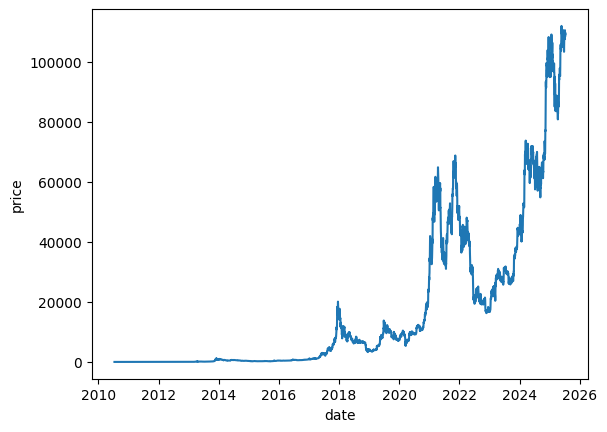

In [130]:
plt.xlabel('date')
plt.ylabel('price')
plt.plot(df['timestamp'], df['high'])

In [295]:
from datetime import date
def create_collection(df):

    df = df.reset_index(drop=True)
    
    l = len(df)

    grid = []
    height = []
    colors = []
    
    for i in range(l):
        if df.loc[i, 'close'] > df.loc[i, 'open']:
            grid.append([i, df.loc[i, 'open']])
            height.append(df.loc[i, 'close'] - df.loc[i, 'open'])
            colors.append('green')
        elif df.loc[i, 'close'] < df.loc[i, 'open']:
            grid.append([i, df.loc[i, 'close']])
            height.append(df.loc[i, 'open'] - df.loc[i, 'close'])
            colors.append('red')
    grid = np.array(grid)

    patches = []
    lines = []
    width = 0.5
    
    for i in range(l):
        
        rect = mpatches.Rectangle(grid[i]-[width/2, 0.0], width, height[i])
        patches.append(rect)
        line = mlines.Line2D([i, i], [df.loc[i, 'low'], df.loc[i, 'high']], lw=0.75, color=colors[i])
        lines.append(line)

    collection = PatchCollection(patches, cmap=plt.cm.hsv)
    collection.set_facecolors([colors[i] for i in range(len(colors))])
    collection.set_linewidth(1.0)
    collection.set_edgecolors([colors[i] for i in range(len(colors))])

    
    return collection, lines

In [295]:
from datetime import date
def create_collection(df):
    df = df.reset_index(drop=True)
    
    l = len(df)

    grid = []
    height = []
    colors = []
    
    for i in range(l):
        if df.loc[i, 'close'] > df.loc[i, 'open']:
            grid.append([i, df.loc[i, 'open']])
            height.append(df.loc[i, 'close'] - df.loc[i, 'open'])
            colors.append('green')
        elif df.loc[i, 'close'] < df.loc[i, 'open']:
            grid.append([i, df.loc[i, 'close']])
            height.append(df.loc[i, 'open'] - df.loc[i, 'close'])
            colors.append('red')
    grid = np.array(grid)

    patches = []
    lines = []
    width = 0.5
    
    for i in range(l):
        
        rect = mpatches.Rectangle(grid[i]-[width/2, 0.0], width, height[i])
        patches.append(rect)
        line = mlines.Line2D([i, i], [df.loc[i, 'low'], df.loc[i, 'high']], lw=0.75, color=colors[i])
        lines.append(line)

    collection = PatchCollection(patches, cmap=plt.cm.hsv)
    collection.set_facecolors([colors[i] for i in range(len(colors))])
    collection.set_linewidth(1.0)
    collection.set_edgecolors([colors[i] for i in range(len(colors))])

    
    return collection, lines

In [231]:
from datetime import date
df_no_time = df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name'])

df_no_time['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_no_time['date'] = pd.to_datetime(df['timestamp']).dt.date
df_no_time = df_no_time.drop(columns=['timestamp'])

df_no_time = df_no_time[df_no_time['date'] >= date(2025, 6, 1)]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   5474 non-null   object 
 1   timeClose  5474 non-null   object 
 2   timeHigh   5474 non-null   object 
 3   timeLow    5474 non-null   object 
 4   name       5474 non-null   int64  
 5   open       5474 non-null   float64
 6   high       5474 non-null   float64
 7   low        5474 non-null   float64
 8   close      5474 non-null   float64
 9   volume     5474 non-null   float64
 10  marketCap  5474 non-null   float64
 11  timestamp  5474 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 513.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 5436 to 5473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       38 non-null     float64
 1   high       38 non-null     float64
 2   lo

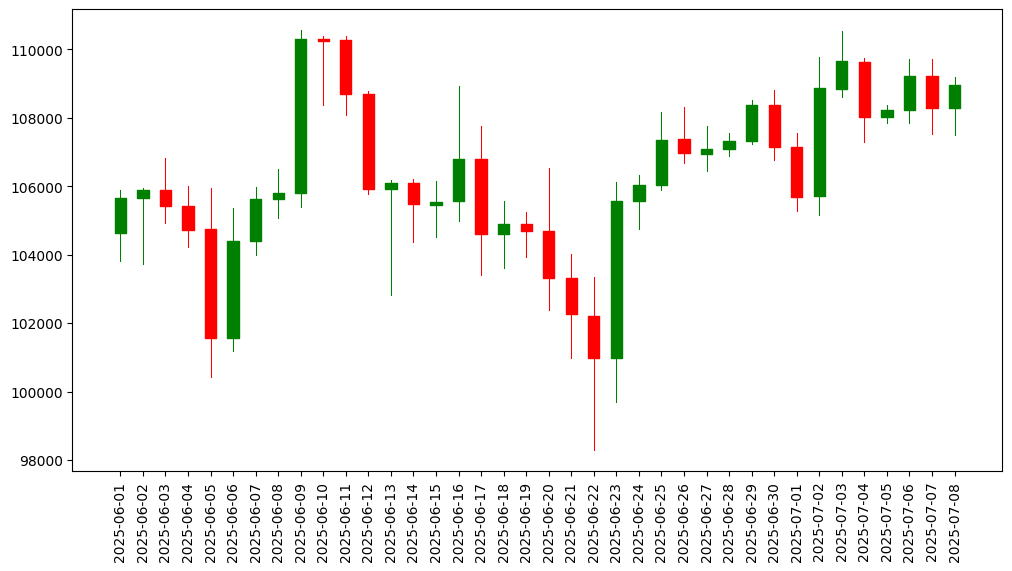

In [296]:
#df_no_time=df_no_time.drop(columns=['date'])
df.info()
df_no_time.info()
df_no_time.head(10)
collection, lines = create_collection(df_no_time)


fig, axs = plt.subplots()
fig.set_figwidth(640)
fig.set_figheight(320)
fig.set_size_inches(12.0, 6.0)

axs.add_collection(collection)
[axs.add_line(lines[i]) for i in range(len(df_no_time))]

plt.axis('auto')

# Настраиваем ось X для отображения дат вместо индексов
x_positions = range(len(df_no_time))  # Позиции от 0 до N-1
x_dates = df_no_time['date'].tolist()  # Соответствующие даты

# Устанавливаем метки на оси X
axs.set_xticks(x_positions)  # Ставим метки на позициях индексов
axs.set_xticklabels([date.strftime('%Y-%m-%d') for date in x_dates], rotation=90)  # Но подписываем датами

#plt.xplot(df_no_time['date'])
#plt.xlabel(df_no_time['date'])
plt.show()

In [237]:
df_no_time.head()

,open,high,low,close,volume,marketCap,date
5436,104637.296687,105884.544289,103826.955562,105652.098563,3.739706e+10,2.099597e+12,2025-06-01
5437,105649.809632,105958.313362,103727.547074,105881.533902,4.581971e+10,2.104388e+12,2025-06-02
5438,105888.473535,106813.579031,104920.844138,105432.470067,4.619651e+10,2.095410e+12,2025-06-03
5439,105434.368315,105997.692342,104232.699950,104731.983255,4.454486e+10,2.081864e+12,2025-06-04
5440,104750.780055,105936.690173,100436.885913,101575.952306,5.747930e+10,2.018776e+12,2025-06-05


In [218]:
df_no_time.loc[5472, 'close']

np.float64(108299.851087593)

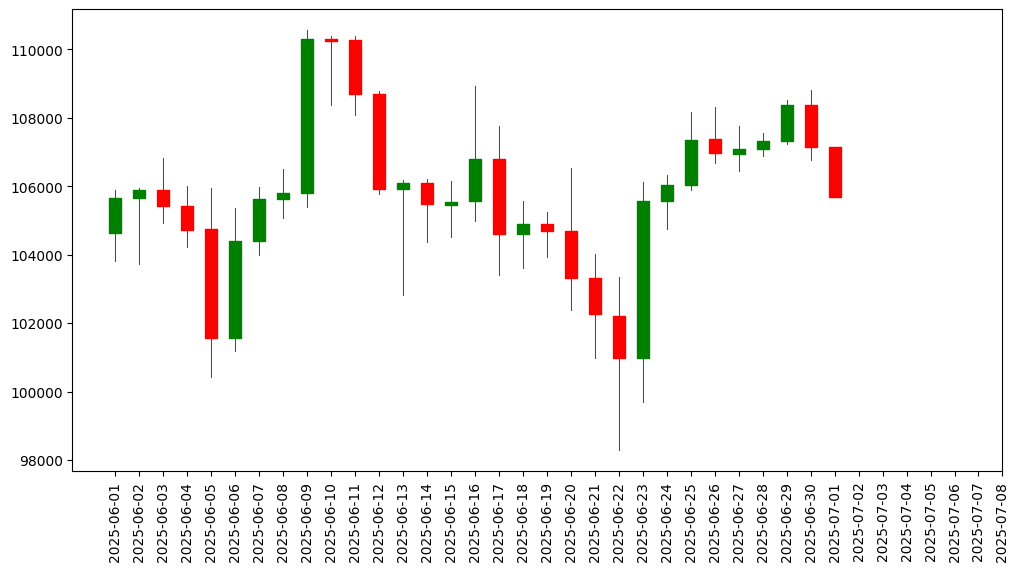

In [292]:
collection, lines = create_collection(df, date(2025, 6, 1), date(2025, 7, 1))


fig, axs = plt.subplots()
fig.set_figwidth(640)
fig.set_figheight(320)
fig.set_size_inches(12.0, 6.0)

axs.add_collection(collection)
[axs.add_line(lines[i]) for i in range(30)]

plt.axis('auto')

# Настраиваем ось X для отображения дат вместо индексов
x_positions = range(len(df_no_time))  # Позиции от 0 до N-1
x_dates = df_no_time['date'].tolist()  # Соответствующие даты

# Устанавливаем метки на оси X
axs.set_xticks(x_positions)  # Ставим метки на позициях индексов
axs.set_xticklabels([date.strftime('%Y-%m-%d') for date in x_dates], rotation=90)  # Но подписываем датами

#plt.xplot(df_no_time['date'])
#plt.xlabel(df_no_time['date'])
plt.show()

In [306]:
#сейчас сделаю функцию, которая вычленяет новый датасет по временным рамкам - эту функцию будем вставлять в начало нашей главной create_collection

def date_part_df(df, date_start, date_end): #a и b это типы данных date(%Y-%m-%d)
    df_no_time = df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name'])
    df_no_time['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
    df_no_time['date'] = pd.to_datetime(df['timestamp']).dt.date
    df_no_time = df_no_time.drop(columns=['timestamp'])
    df_no_time = df_no_time[df_no_time['date'] >= date_start]
    df_no_time = df_no_time[df_no_time['date'] <= date_end]
    #теперь у нас есть датафрейм с нужными границами и нжными столбцами - вернем его
    return df_no_time
    

In [410]:
#теперь попробую внедрить

from datetime import date
def create_collection_part_time (df_default, date_start, date_end):
    #так, сейчас нам требуется подготовить датасет
    if 'timeOpen' in df_default.columns: #здесь мы проверяем - нам дают оригинальный csv или же уже обработанный
        df = date_part_df(df_default, date_start, date_end)
    else:
        df = df_default[df_default['date'] >= date_start]
        df = df[df['date'] <= date_end]        
    #по идее сейчас df - это правильный датасет
    
    df = df.reset_index(drop=True)
    
    l = len(df)

    grid = []
    height = []
    colors = []
    
    for i in range(l):
        if df.loc[i, 'close'] > df.loc[i, 'open']:
            grid.append([i, df.loc[i, 'open']])
            height.append(df.loc[i, 'close'] - df.loc[i, 'open'])
            colors.append('green')
        elif df.loc[i, 'close'] < df.loc[i, 'open']:
            grid.append([i, df.loc[i, 'close']])
            height.append(df.loc[i, 'open'] - df.loc[i, 'close'])
            colors.append('red')
    grid = np.array(grid)

    patches = []
    lines = []
    width = 0.5
    
    for i in range(l):
        
        rect = mpatches.Rectangle(grid[i]-[width/2, 0.0], width, height[i])
        patches.append(rect)
        line = mlines.Line2D([i, i], [df.loc[i, 'low'], df.loc[i, 'high']], lw=0.75, color=colors[i])
        lines.append(line)

    collection = PatchCollection(patches, cmap=plt.cm.hsv)
    collection.set_facecolors([colors[i] for i in range(len(colors))])
    collection.set_linewidth(1.0)
    collection.set_edgecolors([colors[i] for i in range(len(colors))])

    #теперь попробуем сделать принт графика

    fig, axs = plt.subplots()
    fig.set_figwidth(640)
    fig.set_figheight(320)
    fig.set_size_inches(12.0, 6.0)

    axs.add_collection(collection)
    [axs.add_line(lines[i]) for i in range(len(df))]

    plt.axis('auto')

    # Настраиваем ось X для отображения дат вместо индексов
    x_positions = range(len(df))  # Позиции от 0 до N-1
    x_dates = df['date'].tolist()  # Соответствующие даты

    # Устанавливаем метки на оси X
    axs.set_xticks(x_positions)  # Ставим метки на позициях индексов
    axs.set_xticklabels([date.strftime('%Y-%m-%d') for date in x_dates], rotation=90)  # Но подписываем датами
    plt.locator_params(axis="x", nbins=30)

    plt.show()

   # return collection, lines

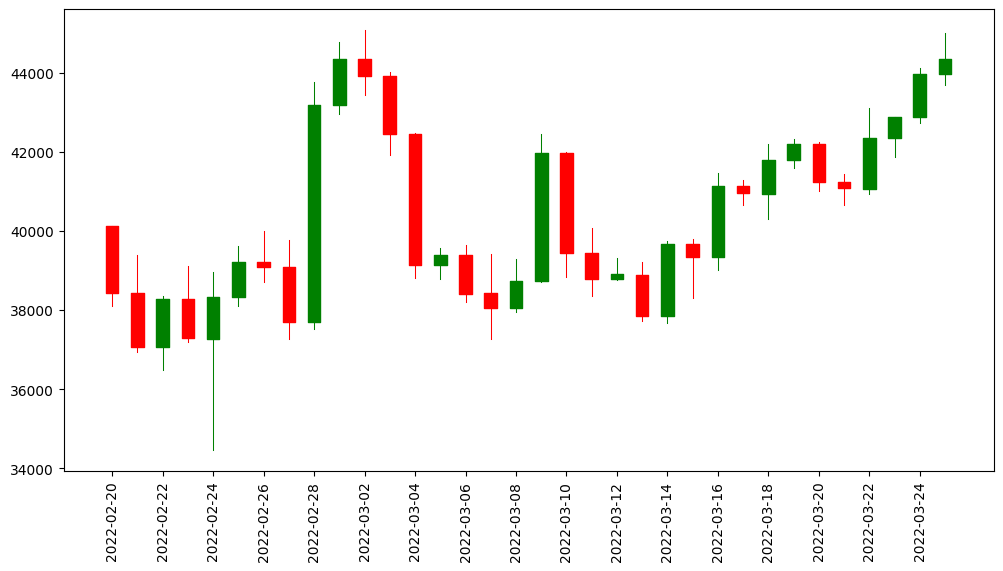

In [399]:
create_collection_part_time(df, date(2022, 2, 20), date(2022, 3, 25))

In [342]:
#начну убирать выбросы - начну с аномально больших торгов >в 10 раз чем обычно
#сначала надо определиться, что значит обычно? объем торгов менялся ведь

#уберем не нужные столбцы

df_volume = df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name'])

df_volume['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M:%S')
df_volume['date'] = pd.to_datetime(df['timestamp']).dt.date
df_volume = df_volume.drop(columns=['timestamp'])

df_volume.info()

#данные преобразованы до нормального вида
#теперь удалим шняги, когда у насс не было торгов вовсе

df_volume_v2 = df_volume[df_volume['volume'] != 0]
df_volume_v2 = df_volume_v2.reset_index(drop=True)
df_volume_v2.info()

#удалили 248 дней - супер - теперь посчитаем среднее:
print(f"Минимальный объем: {df_volume_v2['volume'].min():.6f}")
print(f"Максимальный объем: {df_volume_v2['volume'].max():.2f}")

m_volume = np.mean(df_volume_v2['volume'])

print(f"Среднее значение: ", m_volume)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       5474 non-null   float64
 1   high       5474 non-null   float64
 2   low        5474 non-null   float64
 3   close      5474 non-null   float64
 4   volume     5474 non-null   float64
 5   marketCap  5474 non-null   float64
 6   date       5474 non-null   object 
dtypes: float64(6), object(1)
memory usage: 299.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       5226 non-null   float64
 1   high       5226 non-null   float64
 2   low        5226 non-null   float64
 3   close      5226 non-null   float64
 4   volume     5226 non-null   float64
 5   marketCap  5226 non-null   float64
 6   date       5226 non-null   object 
dtypes: float6

In [356]:
import math
#давайте считать среднеквадратическое отклонение
std = np.std(df_volume_v2['volume'])
print("среднеквадратическое отклонение: ", std)
#в целом по среднему арифметическому считать норм потому что оно должно быть распределено нормально 
#для себя проверю

temp_sum = 0

for index, row in df_volume_v2.iterrows():
    temp_sum += pow((row['volume'] - m_vlume), 2)

dispersion = temp_sum/len(df_volume_v2)

std_otcl = math.sqrt(dispersion)

print("вручную: ", std_otcl)
print("сошлось")

среднеквадратическое отклонение:  20154503245.927715
вручную:  20154503245.927742
сошлось


In [403]:
#у нас все готово по удалению выбросов по объему торгов
#определим допустимое отклонение по среднеквадратичному - у этого даже есть название z-scope
alpha = 2.5

lower = m_vlume - alpha * std
upper = m_vlume + alpha * std

df_volume_v3 = df_volume_v2[df_volume_v2['volume'] >= lower]
df_volume_v3 = df_volume_v3[df_volume_v3['volume'] <= upper]

df_volume_v3 = df_volume_v3.reset_index(drop=True)

df_volume_v3.info()
print(f"Минимальный объем: {df_volume_v3['volume'].min():.6f}")
print(f"Максимальный объем: {df_volume_v3['volume'].max():.2f}")

print("удалено выбросов: ", len(df_volume_v2) - len(df_volume_v3))
print(len(df) - len(df_volume_v2))

#отлично, мы удалили езе 138 выбросов

procent = (248 + 138)/len(df) * 100

print(f"{procent:.2f}", "% данных было удалено")
print(f"{100 - procent:.2f}", "% сохранено")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5088 entries, 0 to 5087
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       5088 non-null   float64
 1   high       5088 non-null   float64
 2   low        5088 non-null   float64
 3   close      5088 non-null   float64
 4   volume     5088 non-null   float64
 5   marketCap  5088 non-null   float64
 6   date       5088 non-null   object 
dtypes: float64(6), object(1)
memory usage: 278.4+ KB
Минимальный объем: 19.990000
Максимальный объем: 65239002918.62
удалено выбросов:  138
248
7.05 % данных было удалено
92.95 % сохранено


In [ ]:
#теперь выкинем резкие взлеты и падения цены - это про непредсказуемые события по типу covid19

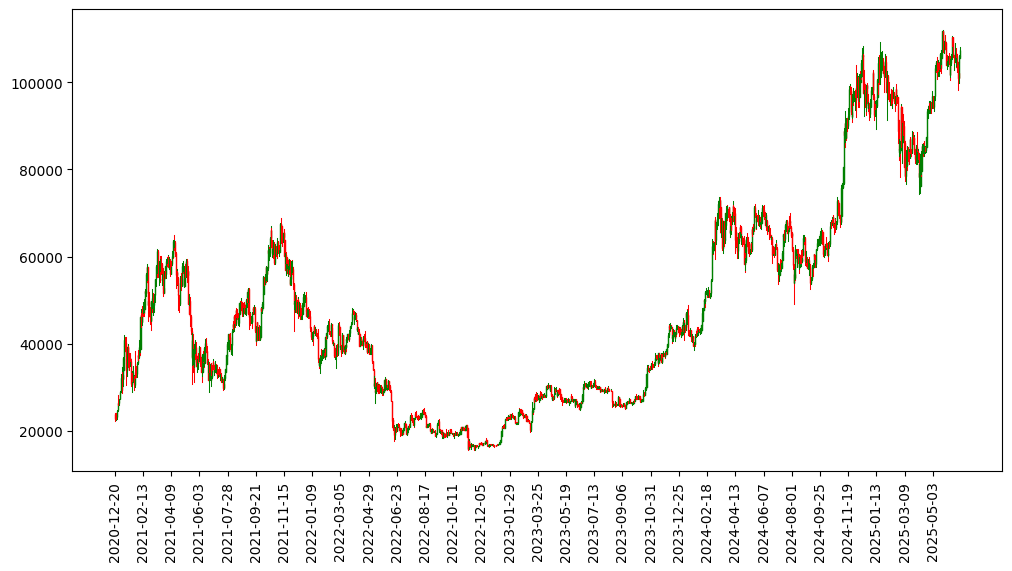

In [412]:
create_collection_part_time(df, date(2020, 12, 20), date(2025, 6, 25))

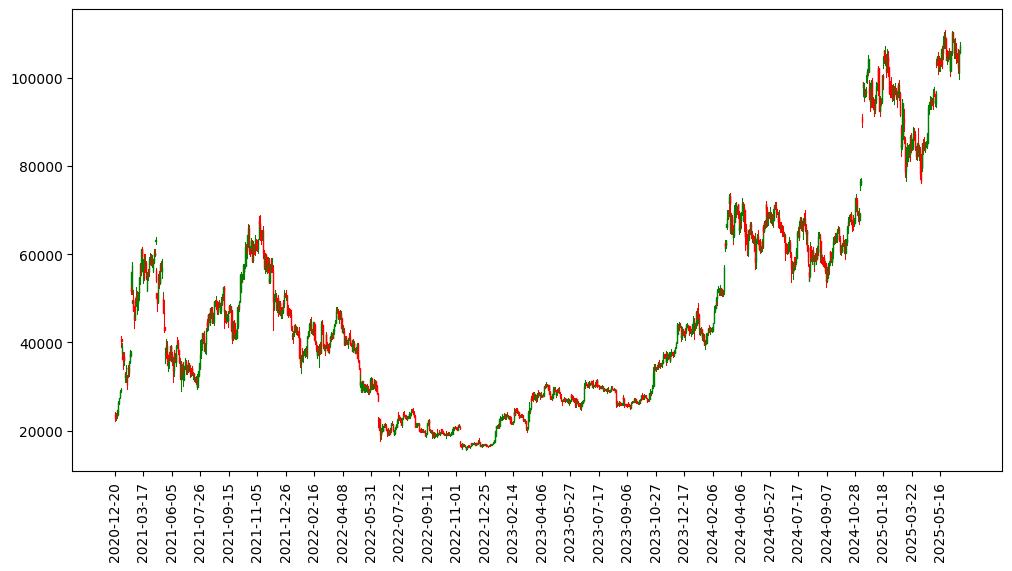

In [411]:
create_collection_part_time(df_volume_v3, date(2020, 12, 20), date(2025, 6, 25))

In [431]:
#выше сравнение графиков оригинального и после первой волны выбросов (по объему торгов)
#дальше я хочу убрать некоторые промежутки - по типу черного лебедя - события, которые невозможно предсказать
#и которые влияют на поведение биткойна

#вот эти события
#covid_period = ['2020-02-15', '2020-04-30']
#ftx_collapse = ['2022-11-06', '2022-12-15'] #биржа ftx сломалась
#china_ban = ['2021-05-18', '2021-06-30']  # Запрет майнинга в Китае

#начнем

df_clean = df_volume_v3[((df_volume_v3['date'] < date(2020, 2, 15)) | (df_volume_v3['date'] > date(2020, 4, 30)))]
df_clean = df_clean[((df_clean['date'] < date(2022, 11, 6)) | (df_clean['date'] > date(2022, 12, 15)))]
df_clean = df_clean[((df_clean['date'] < date(2021, 5, 18)) | (df_clean['date'] > date(2021, 6, 30)))]
df_clean = df_clean.reset_index(drop = True)

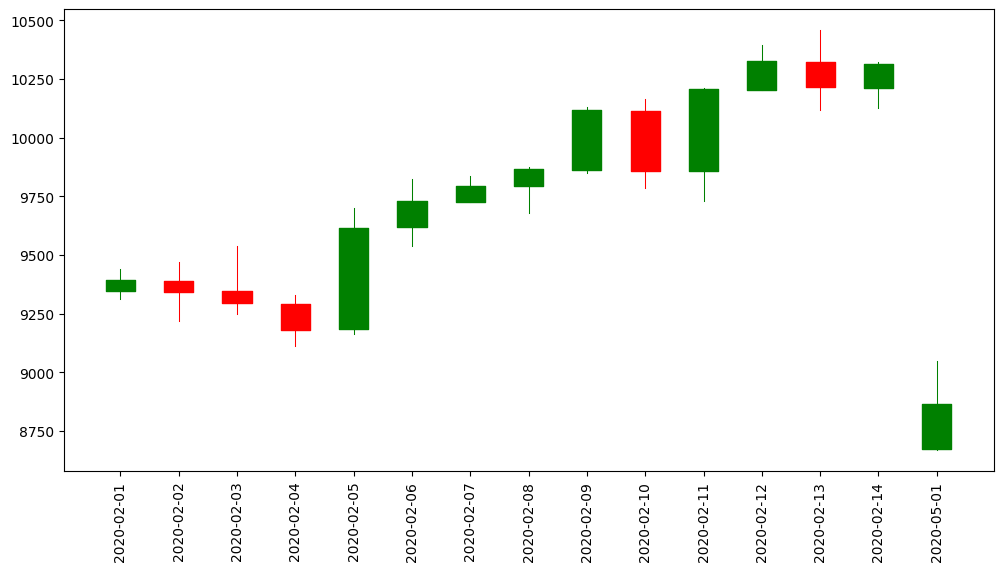

In [434]:
create_collection_part_time(df_clean, date(2020, 2, 1), date(2020, 5, 1))

In [428]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4938 entries, 0 to 5087
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       4938 non-null   float64
 1   high       4938 non-null   float64
 2   low        4938 non-null   float64
 3   close      4938 non-null   float64
 4   volume     4938 non-null   float64
 5   marketCap  4938 non-null   float64
 6   date       4938 non-null   object 
dtypes: float64(6), object(1)
memory usage: 308.6+ KB


In [440]:
#дальше для уборки выбросов 

df_clean['dif'] = df_clean['close'] - df_clean['open']

In [445]:
print(df_clean['dif'].head())
print(df_clean['dif'].tail())

0   -0.001755
1    0.001165
2    0.008490
3   -0.000507
4    0.012726
Name: dif, dtype: float64
4933   -1601.316148
4934     215.342764
4935    1000.885902
4936    -935.476902
4937     652.046569
Name: dif, dtype: float64


0    0.969822
1    1.020663
2    1.146381
3    0.992371
4    1.192559
Name: dif, dtype: float64
4933    0.985394
4934    1.001994
4935    1.009248
4936    0.991436
4937    1.006021
Name: dif, dtype: float64


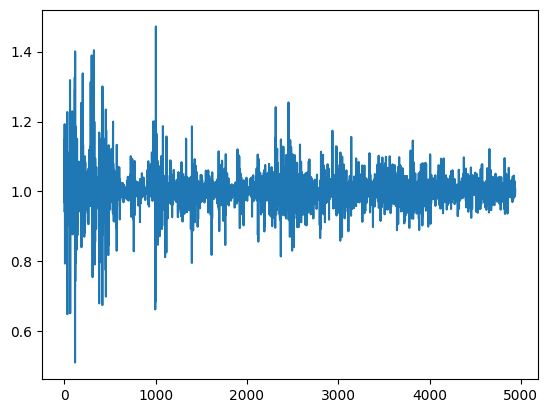

<Axes: >

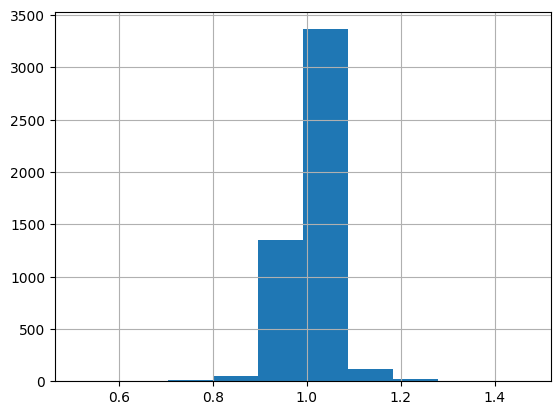

In [457]:
#тут обычный z-scope не подойдет (см почему выше) - наше распределение ДАЛЕКО не нормальное
#поэтому я думаю можно применить такуб тактику - можно брать не саму разницу (прирост/убыль), а пропорцию ['close']/['open']

df_clean['dif'] = df_clean['close']/df_clean['open']
print(df_clean['dif'].head())
print(df_clean['dif'].tail())

plt.plot(df_clean['dif'])
plt.show()
df_clean['dif'].hist()

In [463]:
#мне очень нравится - это уже более менее нормальное распредление
#теперь чистим выбросы - определим стандартное отклонение

clean_std = np.std(df_clean['dif'])
clean_mean = np.mean(df_clean['dif'])

alpha = 2.5

lower = clean_mean - alpha * clean_std
upper = clean_mean + alpha * clean_std

df_final = df_clean[(df_clean['dif'] >= lower) & (df_clean['dif'] <= upper)]


<Axes: >

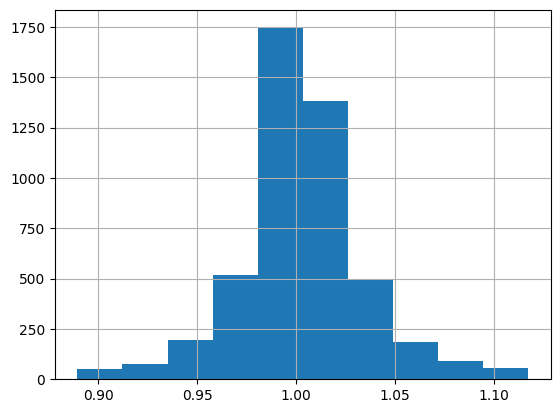

In [464]:
df_final['dif'].hist()

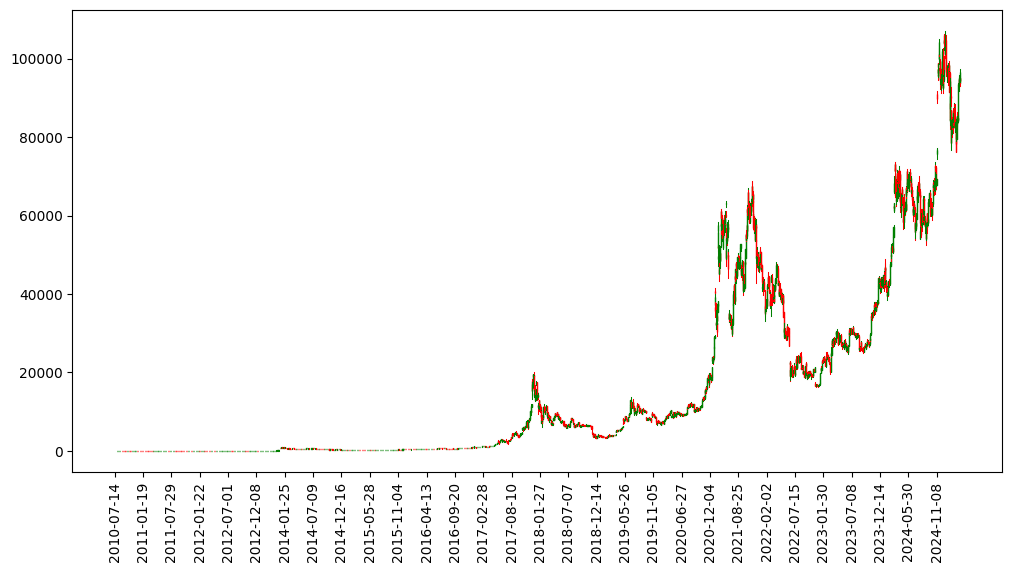

In [465]:
#какая красота

create_collection_part_time(df_final, date(2010, 2, 1), date(2025, 5, 1))

#думаю хватит этого для выбросов

In [482]:
print(df_final.columns)
#Index = ['open', 'high', 'low', 'close', 'volume']
#Cols = ['open', 'high', 'low', 'close', 'volume']
df_analyss = df_final.drop(columns=['dif', 'marketCap'])
df_analyss.info()

#выберем конкретный временной промежуток:
df_analyss = df_analyss[(df_analyss['date'] >= date (2020, 1, 1)) & (df_analyss['date'] <= date (2020, 2, 1))]
df_analyss = df_analyss.drop(columns=['date'])

df_analyss.corr()

Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'date', 'dif'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 0 to 4937
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4803 non-null   float64
 1   high    4803 non-null   float64
 2   low     4803 non-null   float64
 3   close   4803 non-null   float64
 4   volume  4803 non-null   float64
 5   date    4803 non-null   object 
dtypes: float64(5), object(1)
memory usage: 262.7+ KB


,open,high,low,close,volume
open,1.000000,0.967681,0.989649,0.945356,0.458375
high,0.967681,1.000000,0.975562,0.988044,0.601325
low,0.989649,0.975562,1.000000,0.970796,0.464542
close,0.945356,0.988044,0.970796,1.000000,0.585085
volume,0.458375,0.601325,0.464542,0.585085,1.000000


In [37]:
import json
import pandas as pd #здесь данные за все время - раз в 4 дня
with open('avg-block-size.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    block_df = pd.DataFrame(data['avg-block-size'])
#print(data)
print(data.keys())
print(block_df.columns)
block_df['x'].head()
block_df['y'].tail()

block_df['x'] = pd.to_datetime(block_df['x'], unit='ms')

block_df = block_df.rename(columns={'x': 'date'})
block_df = block_df.rename(columns={'y': 'avg-block-size'})

block_df= block_df.reset_index(drop=True)

block_df.tail()


dict_keys(['metric1', 'metric2', 'avg-block-size', 'market-price', 'type', 'average', 'timespan'])
Index(['x', 'y'], dtype='object')


,date,avg-block-size
1509,2025-08-04,1.785084
1510,2025-08-08,1.766668
1511,2025-08-12,1.612479
1512,2025-08-16,1.608893
1513,2025-08-20,1.604659


In [49]:
with open('avg-block-size-year.json', 'r', encoding='utf-8') as file: #здесь данные за последний год - каждый день
    data = json.load(file)
    block_df = pd.DataFrame(data['avg-block-size'])
#print(data)
print(data.keys())
print(block_df.columns)
block_df['x'].head()
block_df['y'].tail()

block_df['x'] = pd.to_datetime(block_df['x'], unit='ms')

block_df = block_df.rename(columns={'x': 'date'})
block_df = block_df.rename(columns={'y': 'avg-block-size'})

block_df= block_df.reset_index(drop=True)

block_df.tail()

dict_keys(['metric1', 'metric2', 'avg-block-size', 'market-price', 'type', 'average', 'timespan'])
Index(['x', 'y'], dtype='object')


,date,avg-block-size
359,2025-08-16,1.608893
360,2025-08-17,1.617206
361,2025-08-18,1.594488
362,2025-08-19,1.580487
363,2025-08-20,1.604659


In [50]:
# hash_rate_df = pd.read_json('hash-rate.json')
# hash_rate_df = hash_rate_df.drop(columns=['metric1', 'metric2', 'timespan', 'average', 'type'])

# hash_rate_df['date'] = hash_rate_df['hash-rate'].apply(lambda x: x['x'])
# hash_rate_df['hash-rate'] = hash_rate_df['hash-rate'].apply(lambda x: x['y'])
# hash_rate_df['market-price'] = hash_rate_df['market-price'].apply(lambda x: x['y'])
# hash_rate_df['date'] = pd.to_datetime(hash_rate_df['date'], unit='ms')


with open('hash-rate-year.json', 'r', encoding='utf-8') as file: #здесь данные за последний год - каждый день
    data = json.load(file)
    hash_df = pd.DataFrame(data['hash-rate'])
#print(data)
print(data.keys())
print(block_df.columns)
hash_df['x'].head()
hash_df['y'].tail()

hash_df['x'] = pd.to_datetime(hash_df['x'], unit='ms')

hash_df = hash_df.rename(columns={'x': 'date'})
hash_df = hash_df.rename(columns={'y': 'hash-rate'})

hash_df= hash_df.reset_index(drop=True)

hash_df.tail()

dict_keys(['metric1', 'metric2', 'hash-rate', 'market-price', 'type', 'average', 'timespan'])
Index(['date', 'avg-block-size'], dtype='object')


,date,hash-rate
359,2025-08-16,9.780076e+08
360,2025-08-17,9.780076e+08
361,2025-08-18,9.908761e+08
362,2025-08-19,8.621909e+08
363,2025-08-20,9.072307e+08
